In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data

In [58]:
train = pd.read_csv('CSV_train.csv', sep=';')
test = pd.read_csv('test.csv', sep=';')
test_target = pd.read_csv('test_target.csv', sep=';')
test_target= test_target.drop('DEPTH_MD', axis=1)
test = pd.concat([test, test_target], axis=1)

In [59]:
test

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,WELL,FORCE_2020_LITHOFACIES_LITHOLOGY
0,15/9-14,480.628001,423244.50000,6461862.5,-455.624420,NORDLAND GP.,NaN,19.2031,NaN,1.613886,...,96.461990,NaN,NaN,-0.538873,0.130611,NaN,NaN,NaN,15/9-14,65000
1,15/9-14,480.780001,423244.50000,6461862.5,-455.776428,NORDLAND GP.,NaN,19.2031,NaN,1.574376,...,96.454399,NaN,NaN,-0.539232,0.130611,NaN,NaN,NaN,15/9-14,65000
2,15/9-14,480.932001,423244.50000,6461862.5,-455.928436,NORDLAND GP.,NaN,19.2031,NaN,1.436627,...,96.446686,NaN,NaN,-0.540830,0.130611,NaN,NaN,NaN,15/9-14,65000
3,15/9-14,481.084001,423244.50000,6461862.5,-456.080444,NORDLAND GP.,NaN,19.2031,NaN,1.276094,...,161.170166,NaN,NaN,-0.543943,0.130611,NaN,NaN,NaN,15/9-14,65000
4,15/9-14,481.236001,423244.53125,6461862.5,-456.232422,NORDLAND GP.,NaN,19.2031,NaN,1.204704,...,172.489120,NaN,NaN,-0.542104,0.130611,NaN,NaN,NaN,15/9-14,65000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136781,35/9-8,3224.389600,536225.93750,6794880.5,-3199.876465,BAAT GP.,Rannoch Fm.,8.4978,NaN,6.231942,...,26.615782,118.669212,NaN,0.063478,NaN,2.618309,33.523922,NaN,35/9-8,30000
136782,35/9-8,3224.541600,536225.93750,6794880.5,-3200.028320,BAAT GP.,Rannoch Fm.,8.4978,NaN,6.038777,...,25.647141,118.468925,NaN,0.056791,NaN,2.620221,32.643795,NaN,35/9-8,30000
136783,35/9-8,3224.693600,536225.93750,6794880.5,-3200.180176,BAAT GP.,Rannoch Fm.,8.4978,NaN,5.503983,...,23.929407,118.163177,NaN,0.002499,NaN,2.629171,31.763380,NaN,35/9-8,30000
136784,35/9-8,3224.845600,536225.93750,6794880.5,-3200.332031,BAAT GP.,Rannoch Fm.,8.4978,NaN,4.895551,...,22.737293,117.655937,NaN,0.003363,NaN,2.521121,30.884350,NaN,35/9-8,30000


In [143]:
train_wells = train['WELL'].unique()

In [144]:
len(train_wells)

98

In [3]:
train

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.5280,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.6800,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.8320,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.9840,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.1360,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170506,7/1-2 S,3169.3124,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.423170,NaN,NaN,...,27.674368,NaN,NaN,-0.001763,NaN,NaN,26.673708,NaN,30000,2.0
1170507,7/1-2 S,3169.4644,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.379244,NaN,NaN,...,28.024338,NaN,NaN,-0.007600,NaN,NaN,26.840818,NaN,65030,2.0
1170508,7/1-2 S,3169.6164,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.350248,NaN,NaN,...,28.091282,NaN,NaN,-0.018297,NaN,NaN,27.007942,NaN,65030,2.0
1170509,7/1-2 S,3169.7684,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.313779,NaN,NaN,...,28.019775,NaN,NaN,-0.011438,NaN,NaN,27.175179,NaN,65030,2.0


In [4]:
test

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO
0,15/9-14,480.628001,423244.50000,6461862.5,-455.624420,NORDLAND GP.,NaN,19.2031,NaN,1.613886,...,35.525719,NaN,96.461990,NaN,NaN,-0.538873,0.130611,NaN,NaN,NaN
1,15/9-14,480.780001,423244.50000,6461862.5,-455.776428,NORDLAND GP.,NaN,19.2031,NaN,1.574376,...,36.158520,NaN,96.454399,NaN,NaN,-0.539232,0.130611,NaN,NaN,NaN
2,15/9-14,480.932001,423244.50000,6461862.5,-455.928436,NORDLAND GP.,NaN,19.2031,NaN,1.436627,...,36.873703,NaN,96.446686,NaN,NaN,-0.540830,0.130611,NaN,NaN,NaN
3,15/9-14,481.084001,423244.50000,6461862.5,-456.080444,NORDLAND GP.,NaN,19.2031,NaN,1.276094,...,37.304054,NaN,161.170166,NaN,NaN,-0.543943,0.130611,NaN,NaN,NaN
4,15/9-14,481.236001,423244.53125,6461862.5,-456.232422,NORDLAND GP.,NaN,19.2031,NaN,1.204704,...,37.864922,NaN,172.489120,NaN,NaN,-0.542104,0.130611,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136781,35/9-8,3224.389600,536225.93750,6794880.5,-3199.876465,BAAT GP.,Rannoch Fm.,8.4978,NaN,6.231942,...,NaN,8.5,26.615782,118.669212,NaN,0.063478,NaN,2.618309,33.523922,NaN
136782,35/9-8,3224.541600,536225.93750,6794880.5,-3200.028320,BAAT GP.,Rannoch Fm.,8.4978,NaN,6.038777,...,NaN,8.5,25.647141,118.468925,NaN,0.056791,NaN,2.620221,32.643795,NaN
136783,35/9-8,3224.693600,536225.93750,6794880.5,-3200.180176,BAAT GP.,Rannoch Fm.,8.4978,NaN,5.503983,...,NaN,8.5,23.929407,118.163177,NaN,0.002499,NaN,2.629171,31.763380,NaN
136784,35/9-8,3224.845600,536225.93750,6794880.5,-3200.332031,BAAT GP.,Rannoch Fm.,8.4978,NaN,4.895551,...,NaN,8.5,22.737293,117.655937,NaN,0.003363,NaN,2.521121,30.884350,NaN


In [145]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170511 entries, 0 to 1170510
Data columns (total 29 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   WELL                               1170511 non-null  object 
 1   DEPTH_MD                           1170511 non-null  float64
 2   X_LOC                              1159736 non-null  float64
 3   Y_LOC                              1159736 non-null  float64
 4   Z_LOC                              1159736 non-null  float64
 5   GROUP                              1169233 non-null  object 
 6   FORMATION                          1033517 non-null  object 
 7   CALI                               1082634 non-null  float64
 8   RSHA                               630650 non-null   float64
 9   RMED                               1131518 non-null  float64
 10  RDEP                               1159496 non-null  float64
 11  RHOB                    

In [151]:
train.describe()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
count,1.170511e+06,1.159736e+06,1.159736e+06,1.159736e+06,1.082634e+06,630650.000000,1.131518e+06,1.159496e+06,1.009242e+06,1.170511e+06,...,535071.000000,174613.000000,298833.000000,987857.000000,316151.000000,176160.000000,192325.000000,327427.000000,1.170511e+06,1.170332e+06
mean,2.184087e+03,4.856310e+05,6.681276e+06,-2.138527e+03,1.318568e+01,10.694664,4.986978e+00,1.069103e+01,2.284987e+00,7.091370e+01,...,137.367965,204.655019,1.223849,0.012196,1.216329,7.796809,23.505069,-95.779496,6.138598e+04,1.164258e+00
std,9.971821e+02,3.455641e+04,1.281524e+05,9.709426e+02,3.798907e+00,100.642597,5.467269e+01,1.139480e+02,2.532835e-01,3.423149e+01,...,1539.383558,71.068461,54.372859,7.477798,10.180834,89.741807,22.632800,348.980030,1.389170e+04,4.451180e-01
min,1.360860e+02,4.268988e+05,6.406641e+06,-5.395563e+03,2.344000e+00,0.000100,-8.418695e-03,3.170056e-02,7.209712e-01,1.092843e-01,...,-0.117977,69.163177,-12.215459,-7429.338867,0.125818,0.056586,-999.250122,-999.900024,3.000000e+04,1.000000e+00
25%,1.418597e+03,4.547996e+05,6.591327e+06,-2.811502e+03,9.429712e+00,0.854120,9.140862e-01,9.102396e-01,2.092203e+00,4.762722e+01,...,5.628000,155.936707,0.148438,-0.009253,0.143792,0.891272,11.281895,0.687681,6.500000e+04,1.000000e+00
50%,2.076605e+03,4.769203e+05,6.737311e+06,-2.042785e+03,1.255575e+01,1.399020,1.443584e+00,1.439000e+00,2.321228e+00,6.836763e+01,...,17.799999,188.200653,0.557320,0.001752,0.155774,1.967156,20.131153,1.366672,6.500000e+04,1.000000e+00
75%,2.864393e+03,5.201532e+05,6.784886e+06,-1.391866e+03,1.671075e+01,3.099348,2.680930e+00,2.557220e+00,2.488580e+00,8.903551e+01,...,34.812794,224.645081,1.299655,0.021702,1.168307,5.084564,31.138481,3.420790,6.500000e+04,1.000000e+00
max,5.436632e+03,5.726328e+05,6.856661e+06,-1.110860e+02,2.827900e+01,2193.904541,1.988616e+03,1.999887e+03,3.457820e+00,1.076964e+03,...,47015.125000,676.578125,10011.422852,2.836938,185.730927,10000.000000,742.797852,35930.671875,9.900000e+04,3.000000e+00


In [152]:
test.describe()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY
count,136786.000000,136727.000000,1.367270e+05,136727.000000,131141.000000,39097.000000,136199.000000,136727.000000,119826.000000,136786.000000,...,66964.000000,68316.000000,43220.000000,13515.000000,111556.000000,20269.000000,11316.000000,55790.000000,29848.000000,136786.000000
mean,2501.136889,467884.598172,6.708199e+06,-2397.835918,12.613567,3.137817,3.844914,3.662074,2.324925,65.223264,...,10.963364,26.406939,185.389543,0.160979,0.014441,6.028683,4.906861,22.669058,5.280645,59893.634875
std,1043.245788,35865.313917,1.352924e+05,937.001116,3.218969,17.293036,24.170949,23.242750,0.243602,31.146538,...,1.839420,31.913763,63.173605,0.536332,0.054151,49.607255,22.963156,13.436052,55.475790,14492.938638
min,227.296008,423237.531250,6.461833e+06,-4362.296387,6.682522,0.255146,0.148474,0.152317,1.289989,6.342400,...,8.500000,0.004297,79.327354,-6.402187,-1.213720,0.129413,0.063258,0.572329,0.262056,30000.000000
25%,1707.948917,442441.406250,6.605454e+06,-3171.749634,9.049458,0.850029,0.933067,0.902655,2.116576,44.557275,...,8.500000,12.240131,146.022373,0.027619,-0.001835,0.134206,0.543010,12.753529,1.081298,65000.000000
50%,2471.823595,455904.187500,6.759398e+06,-2442.877197,12.428942,1.416000,1.669926,1.657664,2.376285,60.110472,...,12.250001,20.878899,175.515274,0.124714,0.009203,0.143792,1.435970,19.927827,1.587683,65000.000000
75%,3294.643006,485144.859375,6.822772e+06,-1681.509217,14.177558,2.578526,3.088695,2.894494,2.531131,82.757637,...,12.250001,31.232986,204.037148,0.247048,0.026884,0.149783,4.425004,29.882400,3.274492,65000.000000
max,5007.417975,548460.437500,6.853315e+06,-205.295288,27.344881,1566.168457,1901.766602,1582.094482,3.073430,500.878357,...,17.500000,621.078247,494.096802,7.362912,0.404614,426.921356,957.984436,131.990906,2000.000000,99000.000000


In [5]:
train.isna().sum()

WELL                                       0
DEPTH_MD                                   0
X_LOC                                  10775
Y_LOC                                  10775
Z_LOC                                  10775
GROUP                                   1278
FORMATION                             136994
CALI                                   87877
RSHA                                  539861
RMED                                   38993
RDEP                                   11015
RHOB                                  161269
GR                                         0
SGR                                  1101158
NPHI                                  405102
PEF                                   498819
DTC                                    80863
SP                                    306264
BS                                    487854
ROP                                   635440
DTS                                   995898
DCAL                                  871678
DRHO      

# Visualize the data

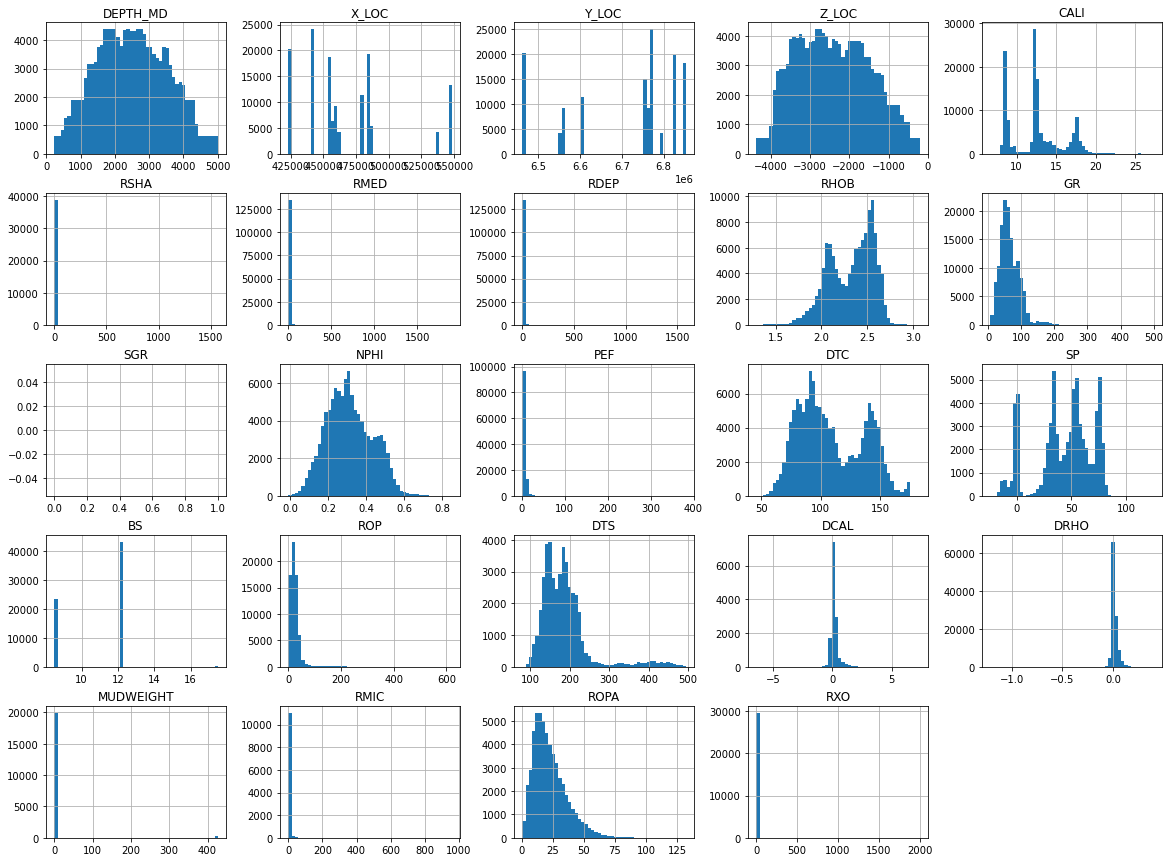

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
test.hist(bins=50, figsize=(20,15))
plt.show()

In [150]:
train.skew()

<ipython-input-150-1d3a3c99b9d6>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.skew()


DEPTH_MD                               0.412859
X_LOC                                  0.343453
Y_LOC                                 -0.632032
Z_LOC                                 -0.408598
CALI                                   0.457094
RSHA                                  16.086034
RMED                                  33.010774
RDEP                                  15.775403
RHOB                                  -0.550712
GR                                     1.672997
SGR                                    0.658576
NPHI                                   0.337386
PEF                                   13.979144
DTC                                    0.152485
SP                                    -0.840737
BS                                     0.747537
ROP                                   17.021738
DTS                                    1.683970
DCAL                                 181.351561
DRHO                                -992.747145
MUDWEIGHT                             15

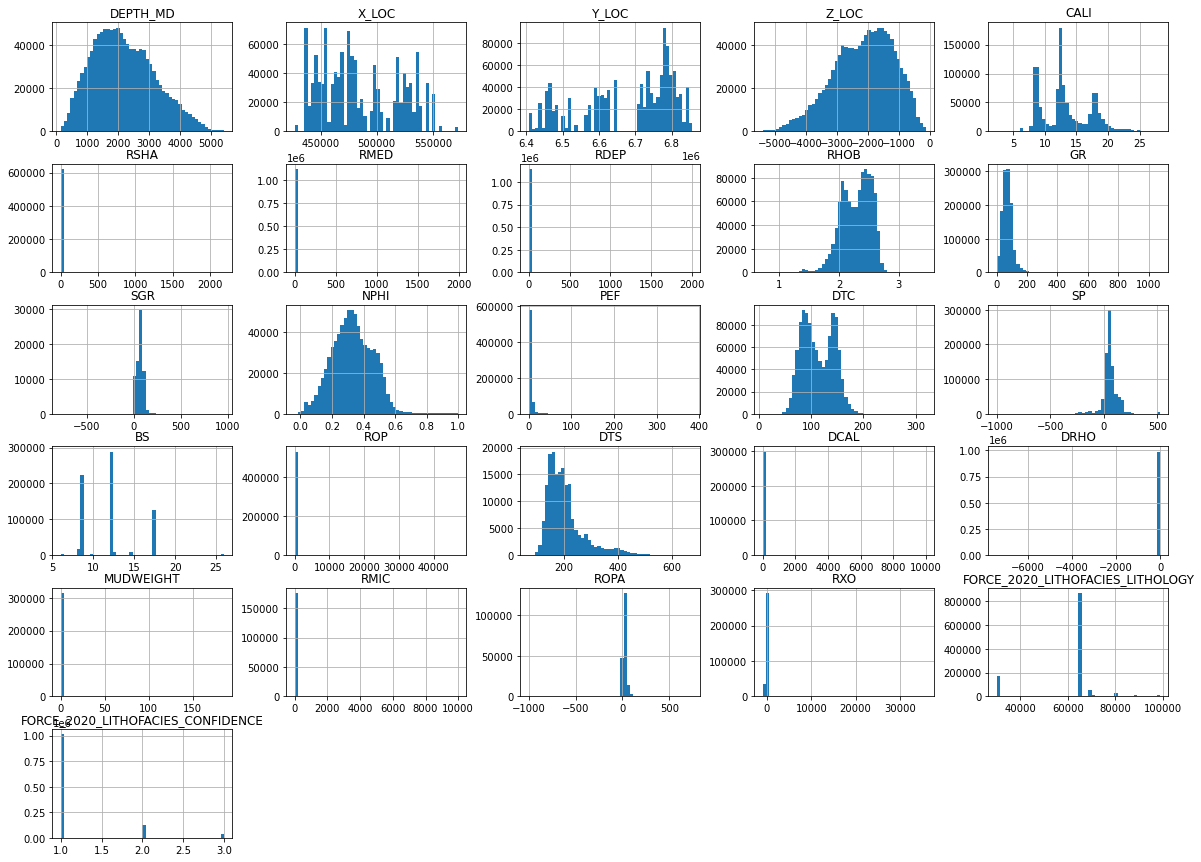

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(20,15))
plt.show()

In [84]:
lithology_keys = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}
lithology_keys

{30000: 'Sandstone',
 65030: 'Sandstone/Shale',
 65000: 'Shale',
 80000: 'Marl',
 74000: 'Dolomite',
 70000: 'Limestone',
 70032: 'Chalk',
 88000: 'Halite',
 86000: 'Anhydrite',
 99000: 'Tuff',
 90000: 'Coal',
 93000: 'Basement'}

<ipython-input-85-89a4667281c2>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names, rotation=45)


Text(0, 0.5, 'Lithology presence (\\%)')

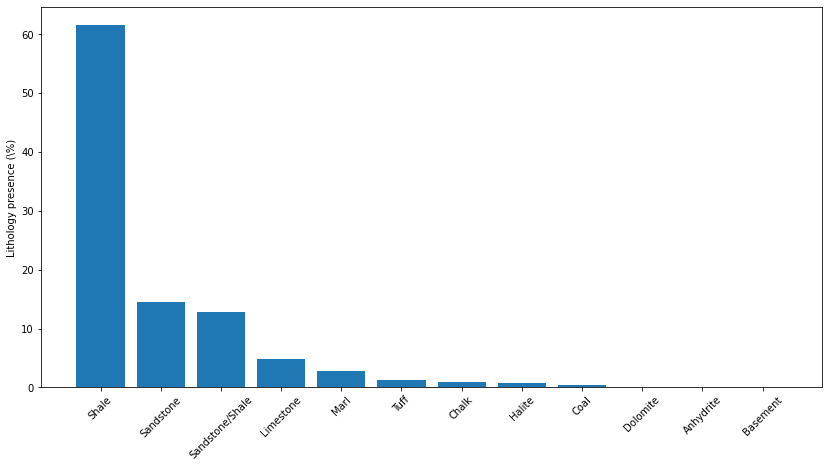

In [85]:
counts = train['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts()
names = []
percentage = []
N = train['FORCE_2020_LITHOFACIES_LITHOLOGY'].shape[0]
for item in counts.iteritems():
    names.append(lithology_keys[item[0]])
    percentage.append(float(item[1])/N*100)
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.bar(x=np.arange(len(names)), height=percentage)
ax.set_xticklabels(names, rotation=45)
ax.set_xticks(np.arange(len(names)))
ax.set_ylabel('Lithology presence (\%)')


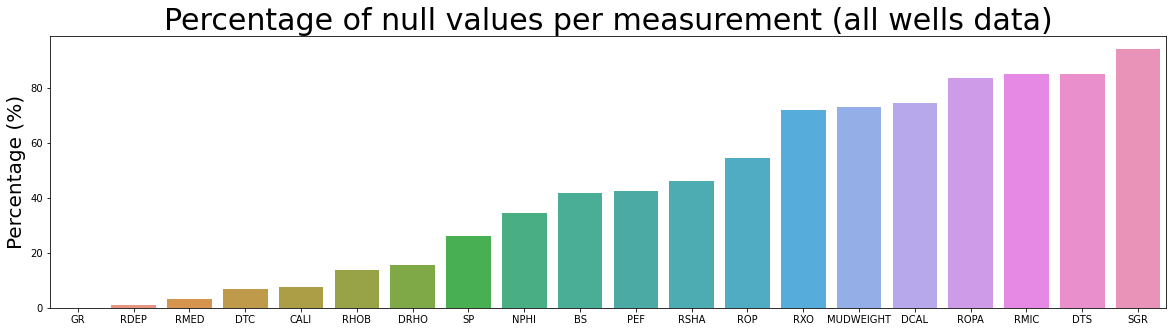

In [8]:
import seaborn as sns
measures_list = train.columns.values[7:-2]
measures_list

nan_values = train[measures_list].isna().mean().sort_values() *100

plt.figure(figsize=(20,5))
splot = sns.barplot(x=nan_values.index,y=nan_values)
splot.set_title("Percentage of null values per measurement (all wells data)", fontsize=30)
splot.set_ylabel('Percentage (%)', fontsize=20)

plt.show()

<ipython-input-10-9378d47db675>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_lt = corr_matrix.where(np.tril(np.ones(corr_matrix.shape)).astype(np.bool))


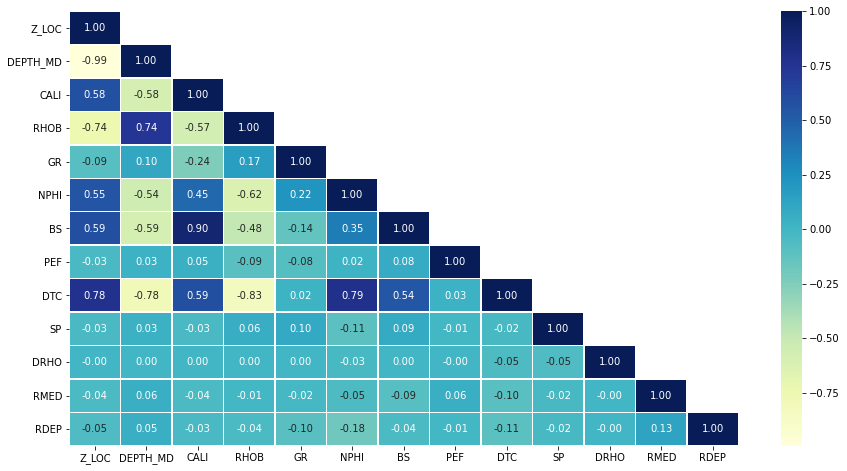

In [10]:
corr_matrix = df.corr()
df_lt = corr_matrix.where(np.tril(np.ones(corr_matrix.shape)).astype(np.bool))

fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.heatmap(df_lt,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()

In [38]:
##log= ['Z_LOC', 'DEPTH_MD','CALI', 'RHOB', 'GR', 'NPHI', 'BS', 'PEF', 'DTC', 'SP','DRHO', 'RMED', 'RDEP','FORCE_2020_LITHOFACIES_LITHOLOGY']

##df= train[log]
##df


In [60]:

def process(data):
    log= ['Z_LOC', 'DEPTH_MD','CALI', 'RHOB', 'GR', 'NPHI', 'BS', 'PEF', 'DTC', 'SP','DRHO', 'RMED', 
          'RDEP','FORCE_2020_LITHOFACIES_LITHOLOGY']
    df= data[log]
    df.fillna(-999, inplace=True)
    x= df.drop('FORCE_2020_LITHOFACIES_LITHOLOGY', axis=1)
    y= df['FORCE_2020_LITHOFACIES_LITHOLOGY']
    lithology_numbers = {30000: 0,
                     65030: 1,
                     65000: 2,
                     80000: 3,
                     74000: 4,
                     70000: 5,
                     70032: 6,
                     88000: 7,
                     86000: 8,
                     99000: 9,
                     90000: 10,
                     93000: 11}

    y = y.map(lithology_numbers)
    return x, y


In [44]:
test

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO
0,15/9-14,480.628001,423244.50000,6461862.5,-455.624420,NORDLAND GP.,NaN,19.2031,NaN,1.613886,...,35.525719,NaN,96.461990,NaN,NaN,-0.538873,0.130611,NaN,NaN,NaN
1,15/9-14,480.780001,423244.50000,6461862.5,-455.776428,NORDLAND GP.,NaN,19.2031,NaN,1.574376,...,36.158520,NaN,96.454399,NaN,NaN,-0.539232,0.130611,NaN,NaN,NaN
2,15/9-14,480.932001,423244.50000,6461862.5,-455.928436,NORDLAND GP.,NaN,19.2031,NaN,1.436627,...,36.873703,NaN,96.446686,NaN,NaN,-0.540830,0.130611,NaN,NaN,NaN
3,15/9-14,481.084001,423244.50000,6461862.5,-456.080444,NORDLAND GP.,NaN,19.2031,NaN,1.276094,...,37.304054,NaN,161.170166,NaN,NaN,-0.543943,0.130611,NaN,NaN,NaN
4,15/9-14,481.236001,423244.53125,6461862.5,-456.232422,NORDLAND GP.,NaN,19.2031,NaN,1.204704,...,37.864922,NaN,172.489120,NaN,NaN,-0.542104,0.130611,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136781,35/9-8,3224.389600,536225.93750,6794880.5,-3199.876465,BAAT GP.,Rannoch Fm.,8.4978,NaN,6.231942,...,NaN,8.5,26.615782,118.669212,NaN,0.063478,NaN,2.618309,33.523922,NaN
136782,35/9-8,3224.541600,536225.93750,6794880.5,-3200.028320,BAAT GP.,Rannoch Fm.,8.4978,NaN,6.038777,...,NaN,8.5,25.647141,118.468925,NaN,0.056791,NaN,2.620221,32.643795,NaN
136783,35/9-8,3224.693600,536225.93750,6794880.5,-3200.180176,BAAT GP.,Rannoch Fm.,8.4978,NaN,5.503983,...,NaN,8.5,23.929407,118.163177,NaN,0.002499,NaN,2.629171,31.763380,NaN
136784,35/9-8,3224.845600,536225.93750,6794880.5,-3200.332031,BAAT GP.,Rannoch Fm.,8.4978,NaN,4.895551,...,NaN,8.5,22.737293,117.655937,NaN,0.003363,NaN,2.521121,30.884350,NaN


In [61]:
x_train, y_train = process(train)
x_test, y_test = process(test)

C:\Users\chiom\code\coding\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [17]:
df.fillna(df.mean(), inplace=True)

C:\Users\chiom\code\coding\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [18]:
df.isna().sum()

Z_LOC                               0
DEPTH_MD                            0
CALI                                0
RHOB                                0
GR                                  0
NPHI                                0
BS                                  0
PEF                                 0
DTC                                 0
SP                                  0
DRHO                                0
RMED                                0
RDEP                                0
FORCE_2020_LITHOFACIES_LITHOLOGY    0
dtype: int64

In [28]:
x_train= df.drop('FORCE_2020_LITHOFACIES_LITHOLOGY', axis=1)
y_train = df['FORCE_2020_LITHOFACIES_LITHOLOGY']

In [30]:
lithology_numbers = {30000: 0,
                     65030: 1,
                     65000: 2,
                     80000: 3,
                     74000: 4,
                     70000: 5,
                     70032: 6,
                     88000: 7,
                     86000: 8,
                     99000: 9,
                     90000: 10,
                     93000: 11}

y_train = y_train.map(lithology_numbers)

In [31]:
y_train

0          2
1          2
2          2
3          2
4          2
          ..
1170506    0
1170507    1
1170508    1
1170509    1
1170510    1
Name: FORCE_2020_LITHOFACIES_LITHOLOGY, Length: 1170511, dtype: int64

In [32]:
from sklearn.ensemble import RandomForestClassifier


In [51]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [62]:
y_pred = model.predict(x_test)

In [70]:
from sklearn.metrics import f1_score, confusion_matrix, precision_score, classification_report, recall_score, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average= 'weighted')
recall = recall_score(y_test, y_pred, average= 'weighted')
f1 = f1_score(y_test, y_pred, average= 'weighted')
class_report = classification_report(y_test.values, y_pred)

C:\Users\chiom\code\coding\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chiom\code\coding\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chiom\code\coding\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chiom\code\coding\lib\site-packages\sklearn\metrics\_

In [66]:
accuracy

0.7515096574210811

In [73]:
print(f"Acc: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")
print(f"Class_Report: {class_report}")

Acc: 75.15%
Precision: 0.72
Recall: 0.75
F1 score: 0.73
Class_Report:               precision    recall  f1-score   support

           0       0.74      0.84      0.78     24048
           1       0.47      0.27      0.34     17558
           2       0.83      0.90      0.86     83975
           3       0.05      0.02      0.03      3306
           4       0.00      0.00      0.00       416
           5       0.34      0.44      0.38      4798
           6       0.00      0.00      0.00       625
           8       1.00      0.01      0.02       125
           9       0.41      0.19      0.26      1245
          10       0.72      0.52      0.61       690

    accuracy                           0.75    136786
   macro avg       0.45      0.32      0.33    136786
weighted avg       0.72      0.75      0.73    136786



In [74]:
def plot_conf_mat(y_test, y_pred):
    """
    Plots a confusion matrix using Seaborn's heatmap().

    Takes True label and predicted label
    """
    
    conf_mat = confusion_matrix(y_test, y_pred)
    cmn = conf_mat / conf_mat.sum(axis=1)[:, np.newaxis]
    
    fig, ax = plt.subplots(figsize=(15,10))
    ax = sns.heatmap(cmn, fmt='.2%',
                     annot=True)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top-0.5);

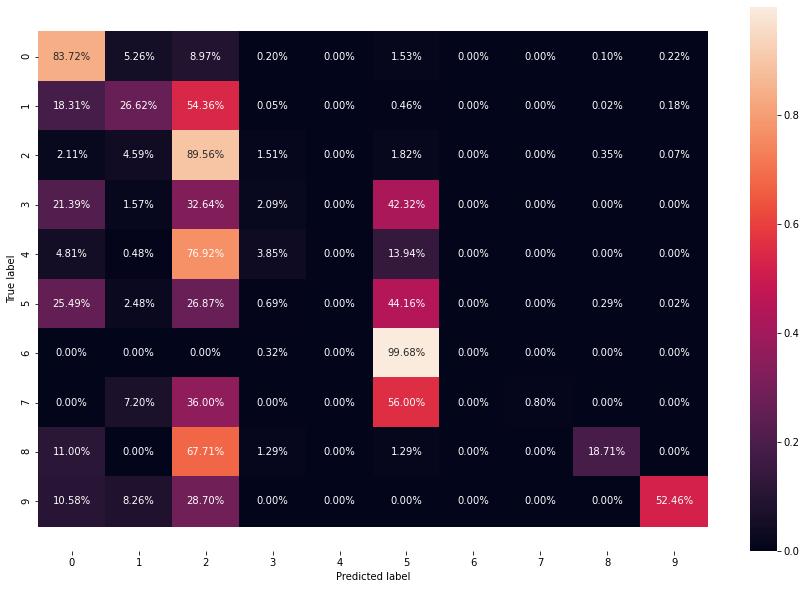

In [75]:
plot_conf_mat(y_test, y_pred)

## Hyperparameter tuning- Random Forest

In [120]:
model_2 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
model_2.fit(x_train,y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [122]:
y_pred_1 = model_2.predict(x_test)

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, precision_score, classification_report, recall_score, accuracy_score
accuracy_1 = accuracy_score(y_test, y_pred_1)
precision_1 = precision_score(y_test, y_pred_1, average= 'weighted')
recall_1 = recall_score(y_test, y_pred_1, average= 'weighted')
f1_1 = f1_score(y_test, y_pred_1, average= 'weighted')
class_report_1 = classification_report(y_test.values, y_pred_1)

In [124]:
print(f"Acc: {accuracy_1 * 100:.2f}%")
print(f"Precision: {precision_1:.2f}")
print(f"Recall: {recall_1:.2f}")
print(f"F1 score: {f1_1:.2f}")
print(f"Class_Report: {class_report_1}")

Acc: 70.84%
Precision: 0.59
Recall: 0.71
F1 score: 0.63
Class_Report:               precision    recall  f1-score   support

           0       0.80      0.50      0.62     24048
           1       0.00      0.00      0.00     17558
           2       0.71      0.99      0.82     83975
           3       0.00      0.00      0.00      3306
           4       0.00      0.00      0.00       416
           5       0.45      0.39      0.42      4798
           6       0.00      0.00      0.00       625
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00       125
           9       0.00      0.00      0.00      1245
          10       0.00      0.00      0.00       690

    accuracy                           0.71    136786
   macro avg       0.18      0.17      0.17    136786
weighted avg       0.59      0.71      0.63    136786



In [126]:
model_3 = RandomForestClassifier(bootstrap=True, criterion= "gini", max_depth=None,
 max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
 min_impurity_split=None, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.0,
 n_estimators=30, n_jobs=None, oob_score=False, random_state=None,
 verbose=0, warm_start=False)
model_3.fit(x_train,y_train)

RandomForestClassifier(max_features=8, n_estimators=30)

In [127]:
 y_pred_3 = model_3.predict(x_test)

In [128]:
from sklearn.metrics import f1_score, confusion_matrix, precision_score, classification_report, recall_score, accuracy_score
accuracy_2 = accuracy_score(y_test, y_pred_3)
precision_2 = precision_score(y_test, y_pred_3, average= 'weighted')
recall_2 = recall_score(y_test, y_pred_3, average= 'weighted')
f1_2 = f1_score(y_test, y_pred_3, average= 'weighted')
class_report_2 = classification_report(y_test.values, y_pred_3)

C:\Users\chiom\code\coding\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chiom\code\coding\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chiom\code\coding\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chiom\code\coding\lib\site-packages\sklearn\metrics\_classification.py:124

In [129]:
print(f"Acc: {accuracy_2 * 100:.2f}%")
print(f"Precision: {precision_2:.2f}")
print(f"Recall: {recall_2:.2f}")
print(f"F1 score: {f1_2:.2f}")
print(f"Class_Report: {class_report_2}")

Acc: 72.37%
Precision: 0.71
Recall: 0.72
F1 score: 0.71
Class_Report:               precision    recall  f1-score   support

           0       0.72      0.81      0.76     24048
           1       0.41      0.27      0.33     17558
           2       0.82      0.85      0.84     83975
           3       0.08      0.08      0.08      3306
           4       0.00      0.00      0.00       416
           5       0.36      0.51      0.42      4798
           6       0.00      0.00      0.00       625
           7       0.00      0.00      0.00         0
           8       1.00      0.03      0.06       125
           9       0.39      0.21      0.28      1245
          10       0.72      0.53      0.61       690

    accuracy                           0.72    136786
   macro avg       0.41      0.30      0.31    136786
weighted avg       0.71      0.72      0.71    136786



In [159]:
model_4 = RandomForestClassifier(bootstrap=True, criterion= "gini", max_depth=70,
 max_features=10, max_leaf_nodes=2, min_impurity_decrease=0.0,
 min_impurity_split=None, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.0,
 n_estimators=1000, n_jobs=2, oob_score=False, random_state=None,
 verbose=0, warm_start=False)
model_4.fit(x_train,y_train)

RandomForestClassifier(max_depth=70, max_features=10, max_leaf_nodes=2,
                       n_estimators=1000, n_jobs=2)

In [160]:
 y_pred_4 = model_4.predict(x_test)

In [161]:
accuracy_4 = accuracy_score(y_test, y_pred_4)
precision_4 = precision_score(y_test, y_pred_4, average= 'weighted')
recall_4 = recall_score(y_test, y_pred_4, average= 'weighted')
f1_4 = f1_score(y_test, y_pred_4, average= 'weighted')
class_report_4 = classification_report(y_test.values, y_pred_4)

C:\Users\chiom\code\coding\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chiom\code\coding\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chiom\code\coding\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chiom\code\coding\lib\site-packages\sklearn\metrics\_

In [162]:
print(f"Acc: {accuracy_4 * 100:.2f}%")
print(f"Precision: {precision_4:.2f}")
print(f"Recall: {recall_4:.2f}")
print(f"F1 score: {f1_4:.2f}")
print(f"Class_Report: {class_report_4}")

Acc: 64.38%
Precision: 0.49
Recall: 0.64
F1 score: 0.54
Class_Report:               precision    recall  f1-score   support

           0       0.46      0.26      0.34     24048
           1       0.00      0.00      0.00     17558
           2       0.66      0.97      0.79     83975
           3       0.00      0.00      0.00      3306
           4       0.00      0.00      0.00       416
           5       0.00      0.00      0.00      4798
           6       0.00      0.00      0.00       625
           8       0.00      0.00      0.00       125
           9       0.00      0.00      0.00      1245
          10       0.00      0.00      0.00       690

    accuracy                           0.64    136786
   macro avg       0.11      0.12      0.11    136786
weighted avg       0.49      0.64      0.54    136786



## LGBM Classifier

In [108]:
import lightgbm as lgbm

In [113]:
model_lgbm = lgbm.LGBMClassifier()
model_lgbm.fit(x_train,y_train)

LGBMClassifier()

In [114]:
 y_pred_2 = model_lgbm.predict(x_test)

In [155]:
from sklearn.metrics import f1_score, confusion_matrix, precision_score, classification_report, recall_score, accuracy_score
accuracy_2 = accuracy_score(y_test, y_pred_2)
precision_2 = precision_score(y_test, y_pred_2, average= 'weighted')
recall_2 = recall_score(y_test, y_pred_2, average= 'weighted')
f1_2 = f1_score(y_test, y_pred_2, average= 'weighted')
class_report_2 = classification_report(y_test.values, y_pred_2)

C:\Users\chiom\code\coding\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chiom\code\coding\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chiom\code\coding\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chiom\code\coding\lib\site-packages\sklearn\metrics\_classification.py:1245: 

In [156]:
print(f"Acc: {accuracy_2 * 100:.2f}%")
print(f"Precision: {precision_2:.2f}")
print(f"Recall: {recall_2:.2f}")
print(f"F1 score: {f1_2:.2f}")
print(f"Class_Report: {class_report_2}")

Acc: 65.14%
Precision: 0.67
Recall: 0.65
F1 score: 0.66
Class_Report:               precision    recall  f1-score   support

           0       0.72      0.67      0.69     24048
           1       0.34      0.28      0.31     17558
           2       0.79      0.78      0.78     83975
           3       0.04      0.08      0.06      3306
           4       0.03      0.01      0.02       416
           5       0.40      0.41      0.41      4798
           6       0.01      0.00      0.01       625
           7       0.00      0.00      0.00         0
           8       0.00      0.02      0.00       125
           9       0.13      0.23      0.16      1245
          10       0.21      0.42      0.28       690
          11       0.00      0.00      0.00         0

    accuracy                           0.65    136786
   macro avg       0.22      0.24      0.23    136786
weighted avg       0.67      0.65      0.66    136786



## Tuning the Hyperparameter

In [201]:
param = {'num_leaves': 100, #120,
         'num_iterations': 700, #400,
         'max_depth': 15,
         'learning_rate': 0.01,
         'feature_fraction': 0.5, #0.5,
         'class_weight': None,
         'bagging_fraction': 0.9 }


In [202]:
model_lgbm_1 = lgbm.LGBMClassifier(learning_rate=param['learning_rate'], max_depth=param['max_depth'],
                               num_leaves=param['num_leaves'], num_iterations=param['num_iterations'], 
                               feature_fraction=param['feature_fraction'], class_weight= None, #param['class_weight']
                               bagging_fraction=param['bagging_fraction'], silent='False',
                               random_state=42, objective = 'multiclass', num_class = 12)
         

In [203]:
model_lgbm_1.fit(x_train,y_train)

C:\Users\chiom\code\coding\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\chiom\code\coding\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


LGBMClassifier(bagging_fraction=0.9, feature_fraction=0.5, learning_rate=0.01,
               max_depth=15, num_class=12, num_iterations=700, num_leaves=100,
               objective='multiclass', random_state=42, silent='False')

In [204]:
 y_pred_5 = model_lgbm_1.predict(x_test)

In [205]:
accuracy_5 = accuracy_score(y_test, y_pred_5)
precision_5 = precision_score(y_test, y_pred_5, average= 'weighted')
recall_5 = recall_score(y_test, y_pred_5, average= 'weighted')
f1_5 = f1_score(y_test, y_pred_5, average= 'weighted')
class_report_5 = classification_report(y_test.values, y_pred_5)

C:\Users\chiom\code\coding\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chiom\code\coding\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chiom\code\coding\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chiom\code\coding\lib\site-packages\sklearn\metrics\_classification.py:124

In [206]:
print(f"Acc: {accuracy_5 * 100:.2f}%")
print(f"Precision: {precision_5:.2f}")
print(f"Recall: {recall_5:.2f}")
print(f"F1 score: {f1_5:.2f}")
print(f"Class_Report: {class_report_5}")

Acc: 73.53%
Precision: 0.72
Recall: 0.74
F1 score: 0.72
Class_Report:               precision    recall  f1-score   support

           0       0.77      0.82      0.79     24048
           1       0.43      0.28      0.34     17558
           2       0.83      0.87      0.85     83975
           3       0.06      0.06      0.06      3306
           4       0.00      0.00      0.00       416
           5       0.35      0.51      0.41      4798
           6       0.00      0.00      0.00       625
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00       125
           9       0.45      0.19      0.27      1245
          10       0.69      0.56      0.62       690
          11       0.00      0.00      0.00         0

    accuracy                           0.74    136786
   macro avg       0.30      0.27      0.28    136786
weighted avg       0.72      0.74      0.72    136786



In [207]:
param = {'num_leaves': 150, #120,
         'num_iterations': 500, #400,
         'max_depth': 30,
         'learning_rate': 0.01,
         'feature_fraction': 0.4, #0.5,
         'class_weight': None,
         'bagging_fraction': 0.8 }


In [208]:
model_lgbm_2 = lgbm.LGBMClassifier(learning_rate=param['learning_rate'], max_depth=param['max_depth'],
                               num_leaves=param['num_leaves'], num_iterations=param['num_iterations'], 
                               feature_fraction=param['feature_fraction'], class_weight= None, #param['class_weight']
                               bagging_fraction=param['bagging_fraction'], silent='False',
                               random_state=42, objective = 'multiclass', num_class = 12)

In [209]:
model_lgbm_2.fit(x_train,y_train)

C:\Users\chiom\code\coding\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\chiom\code\coding\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


LGBMClassifier(bagging_fraction=0.8, feature_fraction=0.4, learning_rate=0.01,
               max_depth=30, num_class=12, num_iterations=500, num_leaves=150,
               objective='multiclass', random_state=42, silent='False')

In [210]:
 y_pred_6 = model_lgbm_1.predict(x_test)

In [211]:
accuracy_6 = accuracy_score(y_test, y_pred_6)
precision_6 = precision_score(y_test, y_pred_6, average= 'weighted')
recall_6 = recall_score(y_test, y_pred_6, average= 'weighted')
f1_6 = f1_score(y_test, y_pred_6, average= 'weighted')
class_report_6 = classification_report(y_test.values, y_pred_6)

C:\Users\chiom\code\coding\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chiom\code\coding\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chiom\code\coding\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chiom\code\coding\lib\site-packages\sklearn\metrics\_classification.py:124

In [213]:
print(f"Acc: {accuracy_6 * 100:.2f}%")
print(f"Precision: {precision_6:.2f}")
print(f"Recall: {recall_6:.2f}")
print(f"F1 score: {f1_6:.2f}")
print(f"Class_Report: {class_report_6}")

Acc: 73.53%
Precision: 0.72
Recall: 0.74
F1 score: 0.72
Class_Report:               precision    recall  f1-score   support

           0       0.77      0.82      0.79     24048
           1       0.43      0.28      0.34     17558
           2       0.83      0.87      0.85     83975
           3       0.06      0.06      0.06      3306
           4       0.00      0.00      0.00       416
           5       0.35      0.51      0.41      4798
           6       0.00      0.00      0.00       625
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00       125
           9       0.45      0.19      0.27      1245
          10       0.69      0.56      0.62       690
          11       0.00      0.00      0.00         0

    accuracy                           0.74    136786
   macro avg       0.30      0.27      0.28    136786
weighted avg       0.72      0.74      0.72    136786

